## User input

In [19]:
icesheet = 'AIS'

In [20]:
# Import libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager as font_manager
from scipy.interpolate import griddata
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter("ignore", UserWarning)

# Set up plotting aesthetics, including getting font
font_dir = ['/projects/metm9666/IDS/']
font_files = font_manager.findSystemFonts(fontpaths=font_dir)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.default'] = 'regular'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [21]:
# Raw data dictionaries
# data = pickle.load(open(icesheet+'_data.p','rb'))
data = pickle.load(open('/Users/metm9666/Desktop/'+icesheet+'_data.p','rb'))

# Interpoalted data dictionaries
# dataInt = pickle.load(open(icesheet+'_data_interpolated.p','rb'))
dataInt = pickle.load(open('/Users/metm9666/Desktop/'+icesheet+'_data_interpolated.p','rb'))

In [22]:
# colors = ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
colors = ['#ff9999','#ff5555','#d40000','#005266','#006680','#44a2a7','#87decd','#afe9dd']

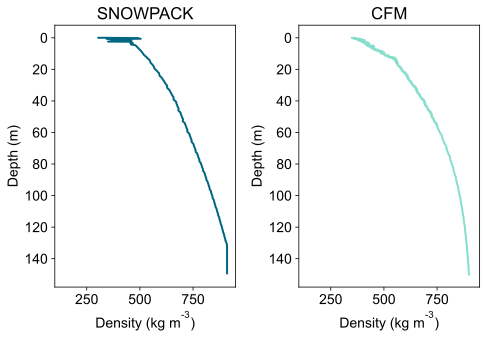

In [23]:
fig, ax = plt.subplots(1,2,figsize=(7,5))
fig.patch.set_facecolor('#FFFFFF')

# Datasets
SP = data[29]['SNOWPACK']
CFM = data[29]['CFM']

# Data arrays
SP_density = SP['Density']
SP_depth = SP['Depth']
CFM_density = CFM['Density']
CFM_depth = CFM['Depth']

ax[0].invert_yaxis()
ax[0].set_ylim((158,-8))
ax[0].set_xlim((100,950))
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel(r'Density (kg m$^{-3}$)')
ax[0].set_title('SNOWPACK')
ax[0].plot(SP_density[SP_depth<=150],SP_depth[SP_depth<=150],
           c=colors[4],lw=2)

ax[1].invert_yaxis()
ax[1].set_ylim((158,-8))
ax[1].set_xlim((100,950))
ax[1].set_ylabel('Depth (m)')
ax[1].set_xlabel(r'Density (kg m$^{-3}$)')
ax[1].set_title('CFM')
ax[1].plot(CFM_density[CFM_depth<=150],CFM_depth[CFM_depth<=150],
           c=colors[6],lw=2)
    
plt.tight_layout()
# plt.savefig('figures/example-output.png',dpi=500)

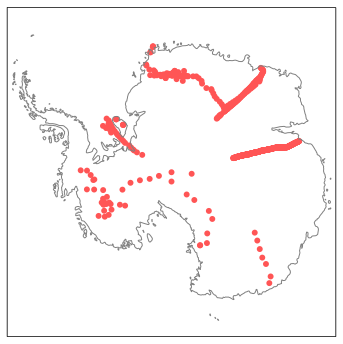

In [24]:
fig = plt.figure(figsize=(5,5))

if icesheet=='AIS':
    axAIS = plt.subplot(1,1,1, projection=ccrs.SouthPolarStereo())
    axAIS.set_extent([-180, 180, -90, -65], ccrs.PlateCarree())
    axAIS.coastlines(resolution='50m',color='#808080')

if icesheet=='GrIS':
    axGrIS = plt.subplot(1,1,1, projection=ccrs.NorthPolarStereo(central_longitude=-45))
    axGrIS.set_extent([-60, -28, 58, 85], ccrs.PlateCarree())
    axGrIS.coastlines(resolution='50m',color='#808080')

for i in range(len(data)):
    
    SU = data[i]['SUMup']
    SU_lat = SU['Latitude']
    SU_lon = SU['Longitude']
    
    if icesheet=='AIS':
        axAIS.scatter(SU_lon,SU_lat,transform=ccrs.PlateCarree(),
                      c=colors[1],edgecolors='none',alpha=1)
    if icesheet=='GrIS':
        axGrIS.scatter(SU_lon,SU_lat,transform=ccrs.PlateCarree(),
                      c=colors[1],edgecolors='none',alpha=1)

plt.tight_layout()
# plt.savefig('figures/sumup-map-'+icesheet+'.png',dpi=500)

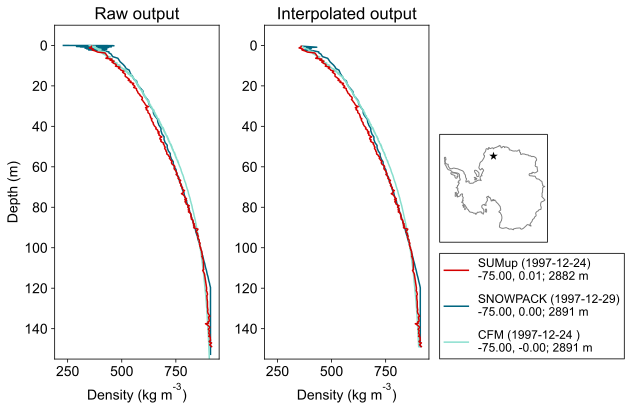

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(9,6))
fig.patch.set_facecolor('#FFFFFF')

# Datasets
SU = data[109]['SUMup']
SP = data[109]['SNOWPACK']
CFM = data[109]['CFM']

# Data arrays
SU_density = SU['Density']
SU_depth = SU['Midpoint']
SP_density = SP['Density']
SP_depth = SP['Depth']
CFM_density = CFM['Density']
CFM_depth = CFM['Depth']

# Label information
# SUMup
SU_lat = SU['Latitude']
SU_lon = SU['Longitude']
SU_elev = SU['Elevation']
SU_ID = SU['CoreID']
SU_date = str(SU['Timestamp'])[:10]

# SNOWPACK
SP_lat = SP['Latitude']
SP_lon = SP['Longitude']
SP_elev = SP['Elevation']
SP_VIR = int(SP['VIR'])
SP_date = str(SP['Timestamp'])[:10]

# CFM
CFM_lat = CFM['Latitude']
CFM_lon = CFM['Longitude']
CFM_elev = SP['Elevation']
CFM_date = str(CFM['Timestamp'])[0:11]

ax[0].invert_yaxis()
ax[0].set_ylim((155,-10))
ax[0].set_xlim((190,950))
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel(r'Density (kg m$^{-3}$)')
ax[0].set_title('Raw output')

ax[0].plot(SU_density,SU_depth,
              c=colors[2],markersize=0,marker='o',lw=1.5,zorder=2,
              label='SUMup ({})\n{:.2f}, {:.2f}; {:.0f} m'.format(SU_date,SU_lat,SU_lon,SU_elev))
ax[0].plot(SP_density,SP_depth,
              c=colors[4],markersize=0,marker='o',lw=1.5,zorder=0,
              label='SNOWPACK ({})\n{:.2f}, {:.2f}; {:.0f} m '.format(SP_date,SP_lat,SP_lon,SP_elev))
ax[0].plot(CFM_density,CFM_depth,
              c=colors[6],markersize=0,marker='o',lw=1.5,zorder=1,
              label='CFM ({})\n{:.2f}, {:.2f}; {:.0f} m '.format(CFM_date,CFM_lat,CFM_lon,CFM_elev))    

# Datasets
SUInt = dataInt[109]['SUMup']
SPInt = dataInt[109]['SNOWPACK']
CFMInt = dataInt[109]['CFM']

# Data arrays
SU_densityInt = SUInt['Density']
SU_depthInt = SUInt['Depth']
SP_densityInt = SPInt['Density']
SP_depthInt = SPInt['Depth']
CFM_densityInt = CFMInt['Density']
CFM_depthInt = CFMInt['Depth']

ax[1].invert_yaxis()
ax[1].set_ylim((155,-10))
ax[1].set_xlim((190,950))
ax[1].set_xlabel(r'Density (kg m$^{-3}$)')
ax[1].set_title('Interpolated output')

ax[1].plot(SU_densityInt,SU_depthInt,
           c=colors[2],markersize=0,marker='o',lw=1.5,zorder=2,
           label='SUMup ({})\n{:.2f}, {:.2f}; {:.0f} m'.format(SU_date,SU_lat,SU_lon,SU_elev))
ax[1].plot(SP_densityInt,SP_depthInt,
           c=colors[4],markersize=0,marker='o',lw=1.5,zorder=0,
           label='SNOWPACK ({})\n{:.2f}, {:.2f}; {:.0f} m '.format(SP_date,SP_lat,SP_lon,SP_elev))
ax[1].plot(CFM_densityInt,CFM_depthInt,
           c=colors[6],markersize=0,marker='o',lw=1.5,zorder=1,
           label='CFM ({})\n{:.2f}, {:.2f}; {:.0f} m '.format(CFM_date,CFM_lat,CFM_lon,CFM_elev)) 

legend = ax[1].legend(prop={'size':12}, bbox_to_anchor=(1.05,-0.0065), loc='lower left',borderpad=0.1,labelspacing=1.0)
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_boxstyle('Square')

# ax_map = inset_axes(ax[1], width=1, height=1.5, bbox_to_anchor=(1.065,0.35),bbox_transform=ax[1].transAxes, 
#                     loc='lower left', borderpad=0,
#                     axes_class=cartopy.mpl.geoaxes.GeoAxes, 
#                     axes_kwargs=dict(map_projection=ccrs.NorthPolarStereo(central_longitude=-45)))
# ax_map.set_extent([-60, -28, 58, 85], ccrs.PlateCarree())

ax_map = inset_axes(ax[1], width=1.5, height=1.5, bbox_to_anchor=(1.065,0.35),bbox_transform=ax[1].transAxes, 
                            loc='lower left', borderpad=0,
                            axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                            axes_kwargs=dict(map_projection=ccrs.SouthPolarStereo()))
ax_map.set_extent([-180, 180, -90, -65], ccrs.PlateCarree())

ax_map.axes.xaxis.set_ticks([])
ax_map.axes.yaxis.set_ticks([])
ax_map.coastlines(resolution='110m',color='#808080',zorder=0)
ax_map.scatter(SP_lon,SP_lat,transform=ccrs.PlateCarree(),
               color='k',s=80,edgecolors='none',marker='*')
    
plt.tight_layout()
# plt.savefig('figures/density-profiles_'+icesheet+'_eg.png',dpi=500)

In [26]:
# Empty lists for storing calculated FAC
SU_ID = []
SU_FAC = []
SP_FAC = []
CFM_FAC = []

for i in range(len(data)):
    
    # Datasets
    SU = data[i]['SUMup']
    SP = data[i]['SNOWPACK']
    CFM = data[i]['CFM']
    
    # SUMup data arrays
    SU_density = SU['Density']
    SU_midpoint = SU['Midpoint']
    SU_startdepth = SU['StartDepth']
    SU_stopdepth = SU['StopDepth']
    SU_thickness = SU['Thickness']
    
    # SNOWPACK data arrays
    SP_density = SP['Density']
    SP_depth = SP['Depth']
    SP_height = SP['Height']
    SP_air = SP['Air']
    
    # CFM data arrays
    CFM_density = CFM['Density']
    CFM_depth = CFM['Depth']
    
    # Find min and max heights
    SU_dmax = max(SU_midpoint)
    SU_dmin = min(SU_midpoint)
    SP_dmin = min(SP_height)
    SP_dmax = max(SP_height)
    CFM_dmin = min(CFM_depth)
    CFM_dmax = max(CFM_depth)
    
    # Determine bounds for calculating FAC
    start = max(SU_dmin,SP_dmin,CFM_dmin)
    stop = min(SU_dmax,SP_dmax,CFM_dmax)
    SU_condition = (SU_midpoint>=start) & (SU_midpoint<=stop)
    SP_condition = (SP_depth>=start) & (SP_depth<=stop)
    CFM_condition = (CFM_depth>=start) & (CFM_depth<=stop)
    
    # SUMup FAC components
    SU_density = np.where(SU_density>917,917,SU_density) # If SUMup density is greater than 917, make it 917 in order to avoid negative FAC
    SU_air = (917-np.array(SU_density))/917 # Calculate fractional air content and FAC
    
    # Calculate FAC for all datasets based on when SUMup dataset has at least one point
    if len(SU_thickness[SU_condition])>0:
        
        # SUMup FAC
        SU_fac = np.sum(SU_thickness[SU_condition]*SU_air[SU_condition]) * (SU_dmax/np.sum(SU_thickness[SU_condition]))
        
        # SNOWPACK FAC
        SP_thickness = SP_height[1:] - SP_height[:-1]
        SP_thickness = np.insert(SP_thickness,0,SP_height[0])
        SP_fac = np.sum(SP_thickness[SP_condition]*SP_air[SP_condition])
        
        # CFM FAC
        CFM_thickness = CFM_depth[1:]-CFM_depth[:-1]
        CFM_thickness = np.insert(CFM_thickness,0,CFM_depth[0])
        CFM_air = (917-np.array(CFM_density))/917
        CFM_fac = np.sum(CFM_thickness[CFM_condition]*CFM_air[CFM_condition])

    else:
        SU_fac = 0
        SP_fac = 0
        CFM_fac = 0
    
    SU_FAC.append(SU_fac)
    SP_FAC.append(SP_fac)
    CFM_FAC.append(CFM_fac)

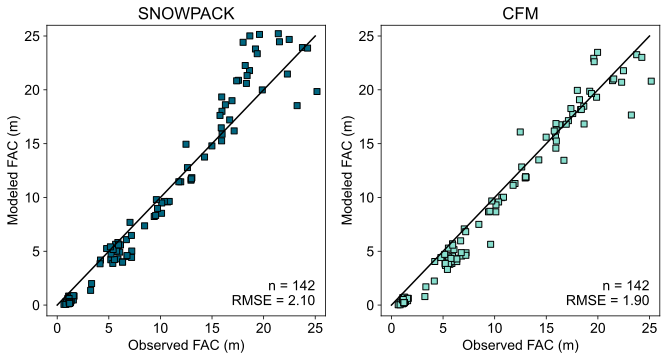

In [27]:
# Prepare array for plotting
SU_FACtotal = np.array(SU_FAC)
SP_FACtotal = np.array(SP_FAC)
CFM_FACtotal = np.array(CFM_FAC)

# Filter out zero-FAC
fac_condition = (SU_FACtotal>0) & (SP_FACtotal>0) & (CFM_FACtotal>0)

SU_FACplot = SU_FACtotal[fac_condition]
SP_FACplot = SP_FACtotal[fac_condition]
CFM_FACplot = CFM_FACtotal[fac_condition]

# Calculate RMSE
SP_rmse = mean_squared_error(SU_FACplot,SP_FACplot,squared=False)
CFM_rmse = mean_squared_error(SU_FACplot,CFM_FACplot,squared=False)

# Create figure
fig, ax = plt.subplots(1,2,figsize=(9.5,5.25))
fig.patch.set_facecolor('#FFFFFF')

# SNOWPACK FAC
ax[0].set_xlabel('Observed FAC (m)')
ax[0].set_ylabel('Modeled FAC (m)')
# ax[0].set_ylim((-1,36))
# ax[0].set_xlim((-1,36))
ax[0].set_ylim((-1,26))
ax[0].set_xlim((-1,26))
ax[0].set_title('SNOWPACK')

# Plot SNOWPACK FAC and 1:1 line
# ax[0].plot([0,35],[0,35],c='k',zorder=1000,label='1:1 line')
ax[0].plot([0,25],[0,25],c='k',zorder=1000,label='1:1 line')
ax[0].scatter(SU_FACplot,SP_FACplot,c=colors[4],marker='s',edgecolor='k',
              label='SNOWPACK')
# ax[0].text(35,0,'n = {}\nRMSE = {:.2f}'.format(len(SU_FACplot),SP_rmse),ha='right')
ax[0].text(25,0,'n = {}\nRMSE = {:.2f}'.format(len(SU_FACplot),SP_rmse),ha='right')

# CFM FAC
ax[1].set_xlabel('Observed FAC (m)')
ax[1].set_ylabel('Modeled FAC (m)')
# ax[1].set_ylim((-1,36))
# ax[1].set_xlim((-1,36))
ax[1].set_ylim((-1,26))
ax[1].set_xlim((-1,26))
ax[1].set_title('CFM')

# ax[1].plot([0,35],[0,35],c='k',zorder=1000,label='1:1 line')
ax[1].plot([0,25],[0,25],c='k',zorder=1000,label='1:1 line')
ax[1].scatter(SU_FACplot,CFM_FACplot,c=colors[6],marker='s',edgecolor='k',
              label='CFM')
# ax[1].text(35,0,'n = {}\nRMSE = {:.2f}'.format(len(SU_FACplot),CFM_rmse),ha='right')
ax[1].text(25,0,'n = {}\nRMSE = {:.2f}'.format(len(SU_FACplot),CFM_rmse),ha='right')

plt.tight_layout()
# plt.savefig('figures/fac_'+icesheet+'.png',dpi=500)

In [617]:
su550 = []
sp550 = []
cfm550 = []

su830 = []
sp830 = []
cfm830 = []

for i in range(len(data)):
# for i in range(415,416):
    
    # Datasets
    SU = data[i]['SUMup']
    SP = data[i]['SNOWPACK']
    CFM = data[i]['CFM']
    
    # Data arrays
    SU_density = SU['Density'][::-1]
    SU_depth = SU['Midpoint'][::-1]
    SP_density = SP['Density']
    SP_depth = SP['Depth']
    CFM_density = CFM['Density']
    CFM_depth = CFM['Depth']
    
    if len(SU_depth) > 1:
        
        z = np.logspace(-2,np.log10(150),500)
        
        SU_densityInt = griddata(SU_depth,SU_density,z)
        SP_densityInt = griddata(SP_depth,SP_density,z)
        CFM_densityInt = griddata(CFM_depth,CFM_density,z)
        
        nanfilter = (~np.isnan(SU_densityInt)) & (~np.isnan(SP_densityInt)) & (~np.isnan(CFM_densityInt))
        SU_densityFilt = SU_densityInt[nanfilter]
        SP_densityFilt = SP_densityInt[nanfilter]
        CFM_densityFilt = CFM_densityInt[nanfilter]
        Z = z[nanfilter]

        if (max(SU_densityFilt)>=550) & (max(SP_densityFilt)>=550) & (max(CFM_densityFilt)>=550):

            SU_z = Z[SU_densityFilt>=550]
            SU_z550 = SU_z[0]
            su550.append(SU_z550)

            SP_z = Z[SP_densityFilt>=550]
            SP_z550 = SP_z[0]
            sp550.append(SP_z550)

            CFM_z = Z[CFM_densityFilt>=550]
            CFM_z550 = CFM_z[0]
            cfm550.append(CFM_z550)

        if (max(SU_densityFilt)>=830) & (max(SP_densityFilt)>=830) & (max(CFM_densityFilt)>=830):

            SU_z2 = Z[SU_densityFilt>=830]
            SU_z830 = SU_z2[0]
            su830.append(SU_z830)

            SP_z2 = Z[SP_densityFilt>=830]
            SP_z830 = SP_z2[0]
            sp830.append(SP_z830)

            CFM_z2 = Z[CFM_densityFilt>=830]
            CFM_z830 = CFM_z2[0]
            cfm830.append(CFM_z830)


/Users/metm9666/opt/anaconda3/envs/analysis/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/metm9666/opt/anaconda3/envs/analysis/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


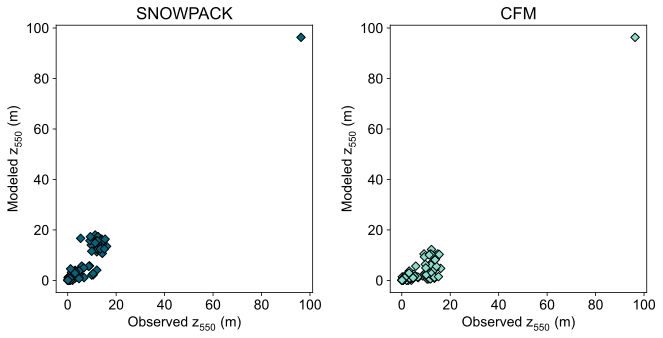

In [618]:
# DEAL WITH BAD POINTS

# Create figure
fig, ax = plt.subplots(1,2,figsize=(9.5,5))
fig.patch.set_facecolor('#FFFFFF')

ax[0].set_xlabel(r'Observed z$_{550}$ (m)')
ax[0].set_ylabel(r'Modeled z$_{550}$ (m)')
ax[0].set_title('SNOWPACK')
# ax[0].set_yscale('log')
# ax[0].set_xscale('log')

# ax[0].plot([0.1,20],[0.1,20],'k',zorder=0)
ax[0].scatter(su550,sp550,c=colors[4],marker='D',edgecolor='k')

ax[1].set_xlabel(r'Observed z$_{550}$ (m)')
ax[1].set_ylabel(r'Modeled z$_{550}$ (m)')
ax[1].set_title('CFM')
# ax[1].set_yscale('log')
# ax[1].set_xscale('log')

# ax[1].plot([0.1,100],[0.1,100],'k',zorder=0)
ax[1].scatter(su550,cfm550,c=colors[6],marker='D',edgecolor='k')

plt.tight_layout()
# plt.savefig('figures/z550_'+icesheet+'.png',dpi=500)

In [620]:
len(su550)

114

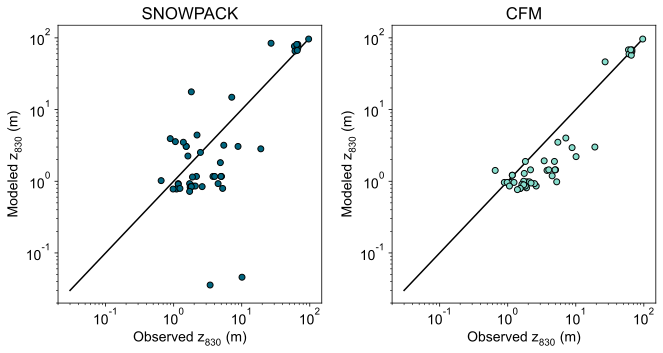

In [619]:
# DEAL WITH BAD POINTS

# Create figure
fig, ax = plt.subplots(1,2,figsize=(9.5,5.25))
fig.patch.set_facecolor('#FFFFFF')

ax[0].set_xlabel(r'Observed z$_{830}$ (m)')
ax[0].set_ylabel(r'Modeled z$_{830}$ (m)')
ax[0].set_title('SNOWPACK')
ax[0].set_yscale('log')
ax[0].set_xscale('log')

ax[0].scatter(su830,sp830,c=colors[4],marker='o',edgecolor='k')
ax[0].plot([0.03,100],[0.03,100],'k',zorder=0)

ax[1].set_xlabel(r'Observed z$_{830}$ (m)')
ax[1].set_ylabel(r'Modeled z$_{830}$ (m)')
ax[1].set_title('CFM')
ax[1].set_yscale('log')
ax[1].set_xscale('log')

ax[1].scatter(su830,cfm830,c=colors[6],marker='o',edgecolor='k')
ax[1].plot([0.03,100],[0.03,100],'k',zorder=0)

plt.tight_layout()
# plt.savefig('figures/z830_'+icesheet+'.png',dpi=500)

In [656]:
dfsSmet = []
dfsSmetMean = []
dfsSmetSum = []

for i in range(len(data)):
    
    merra2 = data[i]['MERRA-2']
    
    # Create dataframe from dictionary (easier for plotting)
    df = pd.DataFrame.from_dict(merra2)
    
    # Calculate time change for snow and rain rates
    df['dt'] = (df.Timestamp-df.Timestamp.shift()).dt.total_seconds()/3600

    # Calculate SMB
    df['SMB'] = ((df.Snow-df.Wind)+df.Rain)*df['dt'] + df.Evaporation + df.Sublimation - df.Runoff
    df['Snowfall'] = (df.Snow-df.Wind)*df.dt
    df['Rainfall'] = df.Rain*df.dt
    
    # Get years and months; set index as timestamp
    df['Year'] = df.Timestamp.dt.year
    df['Month'] = df.Timestamp.dt.month
    df.set_index('Timestamp',inplace=True)
    
    # Resample for annual means/sums and full mean
    dfMean = df.resample('y').mean()
    dfMean = dfMean[['VIR','Latitude','Longitude','Year','Temperature']]
    dfSum = df.resample('y').sum()
    dfSum['VIR'] = dfMean['VIR']
    dfSum['Year'] = dfMean['Year']
    dfSum['Latitude'] = dfMean['Latitude']
    dfSum['Longitude'] = dfMean['Longitude']
    dfSum = dfSum[['VIR','Latitude','Longitude','Year','SMB']]
    
    # Add all dataframes to lists
    dfsSmet.append(df)
    dfsSmetMean.append(dfMean)
    dfsSmetSum.append(dfSum)
    
# Get mean over correct RCI
dfs = []
for i in range(len(dfsSmetSum)):
    
    df = dfsSmetSum[i]
    if icesheet=='GrIS':
        df = df[df.Year<1996]
    else:
        df = df
    dfmean = df.mean()
    dfs.append(dfmean)

dfAnnualMeans = pd.concat(dfs,axis=1).transpose()
dfAnnualMeans = dfAnnualMeans.drop_duplicates()
dfOver200 = dfAnnualMeans[dfAnnualMeans.SMB>200]
dfUnder200 = dfAnnualMeans[dfAnnualMeans.SMB<200]

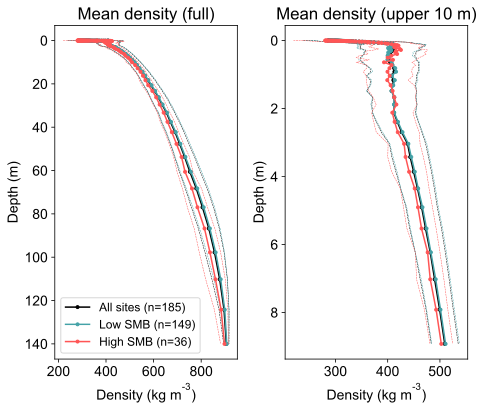

In [607]:
fig, ax = plt.subplots(1,2,figsize=(7,6))
fig.patch.set_facecolor('#FFFFFF')

ax[0].invert_yaxis()
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel(r'Density (kg m$^{-3}$)')
ax[0].set_title('Mean density (full)')

ax[1].invert_yaxis()
ax[1].set_ylabel('Depth (m)')
ax[1].set_xlabel(r'Density (kg m$^{-3}$)')
ax[1].set_title('Mean density (upper 10 m)')

IDs = []
spDensities = []
for i in range(len(data)):
    
    sp = data[i]['SNOWPACK']
    
    # Extract ID and analyze only unique IDs
    spID = sp['VIR']
    if spID not in IDs:
    
        # Define relevant variables
        spDepth = sp['Depth']
        spDensity = sp['Density']

        # Interpolate modeled density onto common grid
        z = np.logspace(-3, np.log10(140), 100)
        spDensityInt = griddata(spDepth,spDensity,z)
        
        # Append lists
        spDensities.append(spDensityInt)
        IDs.append(spID)

spDensities = np.array(spDensities)

spDensitiesLow = []
spDensitiesHigh = []
for i in range(len(dfAnnualMeans)):
    smb = dfAnnualMeans.iloc[i].SMB
    spDensity = spDensities[i]

    # Append lists based on SMB
    if smb < 200:
        spDensitiesLow.append(spDensity)
    else:
        spDensitiesHigh.append(spDensity)
        
# All sites mean density
spDensitiesMean = np.mean(spDensities,axis=0)
spDensitiesStd = np.std(spDensities,axis=0)
    
ax[0].plot(spDensitiesMean,z,
        c='k',marker='o',markersize=3,label='All sites (n={})'.format(len(spDensities)))
ax[0].plot(spDensitiesMean+spDensitiesStd,z,
       c='k',ls='--',lw=0.5)
ax[0].plot(spDensitiesMean-spDensitiesStd,z,
       c='k',ls='--',lw=0.5)

# Mean density SMB < 200
spDensitiesLowMean = np.mean(spDensitiesLow,axis=0)
spDensitiesLowStd = np.std(spDensitiesLow,axis=0)

ax[0].plot(spDensitiesLowMean,z,
        c=colors[5],marker='o',markersize=3,label='Low SMB (n={})'.format(len(spDensitiesLow)))
ax[0].plot(spDensitiesLowMean+spDensitiesLowStd,z,
       c=colors[5],ls='--',lw=0.5)
ax[0].plot(spDensitiesLowMean-spDensitiesLowStd,z,
       c=colors[5],ls='--',lw=0.5)

# Mean density SMB > 200
spDensitiesHighMean = np.mean(spDensitiesHigh,axis=0)
spDensitiesHighStd = np.std(spDensitiesHigh,axis=0)

ax[0].plot(spDensitiesHighMean,z,
        c=colors[1],marker='o',markersize=3,label='High SMB (n={})'.format(len(spDensitiesHigh)))
ax[0].plot(spDensitiesHighMean+spDensitiesHighStd,z,
       c=colors[1],ls='--',lw=0.5)
ax[0].plot(spDensitiesHighMean-spDensitiesHighStd,z,
       c=colors[1],ls='--',lw=0.5)

# Plot upper layers

ax[1].plot(spDensitiesMean[z<=10],z[z<=10],
        c='k',marker='o',markersize=3,label='All sites (n={})'.format(len(spDensities)))
ax[1].plot(spDensitiesMean[z<=10]+spDensitiesStd[z<=10],z[z<=10],
       c='k',ls='--',lw=0.5)
ax[1].plot(spDensitiesMean[z<=10]-spDensitiesStd[z<=10],z[z<=10],
       c='k',ls='--',lw=0.5)

ax[1].plot(spDensitiesLowMean[z<=10],z[z<=10],
        c=colors[5],marker='o',markersize=3,label='Low SMB (n={})'.format(len(spDensitiesLow)))
ax[1].plot(spDensitiesLowMean[z<=10]+spDensitiesLowStd[z<=10],z[z<=10],
       c=colors[5],ls='--',lw=0.5)
ax[1].plot(spDensitiesLowMean[z<=10]-spDensitiesLowStd[z<=10],z[z<=10],
       c=colors[5],ls='--',lw=0.5)

ax[1].plot(spDensitiesHighMean[z<=10],z[z<=10],
        c=colors[1],marker='o',markersize=3,label='High SMB (n={})'.format(len(spDensitiesHigh)))
ax[1].plot(spDensitiesHighMean[z<=10]+spDensitiesHighStd[z<=10],z[z<=10],
       c=colors[1],ls='--',lw=0.5)
ax[1].plot(spDensitiesHighMean[z<=10]-spDensitiesHighStd[z<=10],z[z<=10],
       c=colors[1],ls='--',lw=0.5)

ax[0].legend(prop={'size':12},loc='lower left')
plt.tight_layout()
# plt.savefig('figures/mean-density_'+icesheet+'.png',dpi=500)

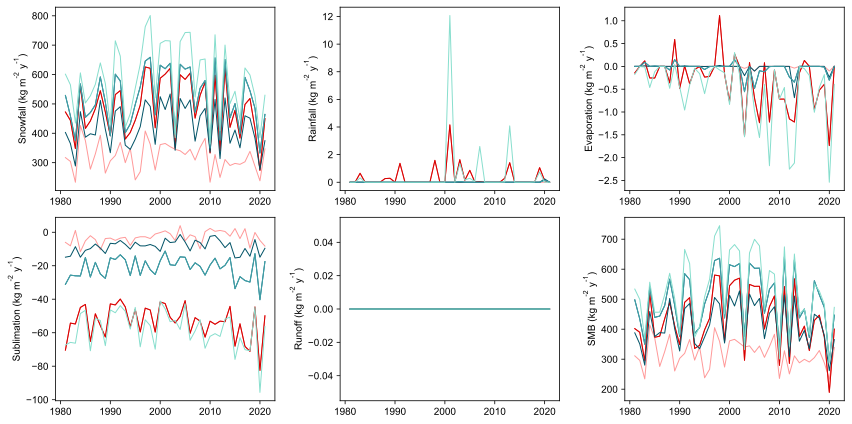

In [666]:
# Create figure for plotting
fig, ax = plt.subplots(2,3,figsize=(12,6))
fig.patch.set_facecolor('#FFFFFF')

mpl.rcParams['font.size'] = 10
import matplotlib.dates as mdates

ax[0,0].set_ylabel('Snowfall (kg m$^{-2}$ y$^{-1}$)')
ax[0,1].set_ylabel('Rainfall (kg m$^{-2}$ y$^{-1}$)')
ax[0,2].set_ylabel('Evaporation (kg m$^{-2}$ y$^{-1}$)')
ax[1,0].set_ylabel('Sublimation (kg m$^{-2}$ y$^{-1}$)')
ax[1,1].set_ylabel('Runoff (kg m$^{-2}$ y$^{-1}$)')
ax[1,2].set_ylabel('SMB (kg m$^{-2}$ y$^{-1}$)')

for col in range(0,3):
    for row in range(0,2):
        ax[row,col].xaxis.set_major_locator(mdates.YearLocator(10,month=1,day=1))
        ax[row,col].xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 

# Loop through stations
for i in range(30,37):
    
    # Extract dataframe from list
    dfSmet = dfsSmet[i]
    
    # Calculate annual and monthly sums
    dfSmetAnnual = dfSmet.resample('y').sum()
    dfSmetMonthly = dfSmet.resample('m').sum()
    
    ax[0,0].plot(dfSmetAnnual.Snowfall,lw=1,color=colors[i-30])
    ax[0,1].plot(dfSmetAnnual.Rainfall,lw=1,color=colors[i-30])
    ax[0,2].plot(dfSmetAnnual.Evaporation,lw=1,color=colors[i-30])
    ax[1,0].plot(dfSmetAnnual.Sublimation,lw=1,color=colors[i-30])
    ax[1,1].plot(dfSmetAnnual.Runoff,lw=1,color=colors[i-30])
    ax[1,2].plot(dfSmetAnnual.SMB,lw=1,color=colors[i-30])

    plt.tight_layout()

# plt.savefig('figures/SMB_components.png',dpi=500)